In [1]:
from dynRNN.cells import *

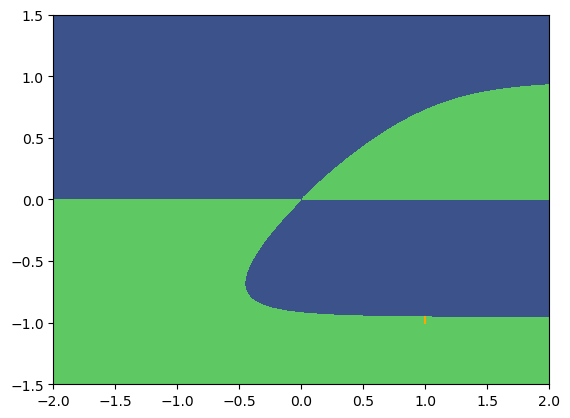

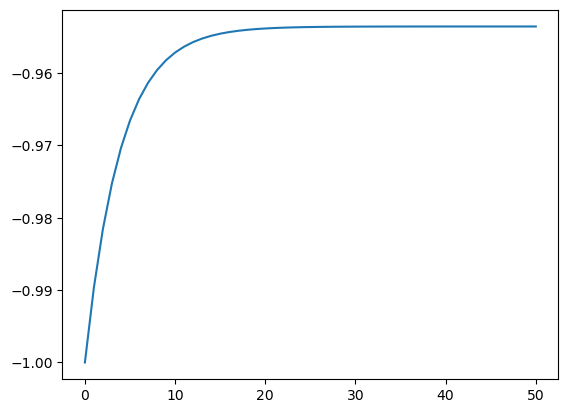

In [3]:
# GRU/BRC

x = torch.linspace(-2, 2, 1000)
y = torch.linspace(-1.5, 1.5, 301)

xy_grid = torch.meshgrid(x, y, indexing="ij")

x_g = xy_grid[0].T
y_g = xy_grid[1].T.flip(0, 1)

BRC = BRCell()
Pa = -1
C = 1
W = 1
Wc = 1
Wa = 1
pars = Pa, C, W, Wc, Wa

ax = BRC.phaseplane(x_g, y_g, pars, input=0, bifurcation=True)

xt = 0*torch.randn(50)
h0 = torch.tensor(-1)
s0 = torch.tensor(1)

ht, st = BRC.trajectory(h0, s0, pars, xt)
ax.plot(st[0]*torch.ones(len(ht)), ht, 'orange')
plt.show()

# plt.plot(xt)
# plt.plot(B*torch.tanh(torch.tensor(D*C))/(1-A)*torch.ones_like(xt), 'blue')
# plt.plot(D*torch.ones_like(xt), 'blue')
plt.plot(ht)
plt.show()

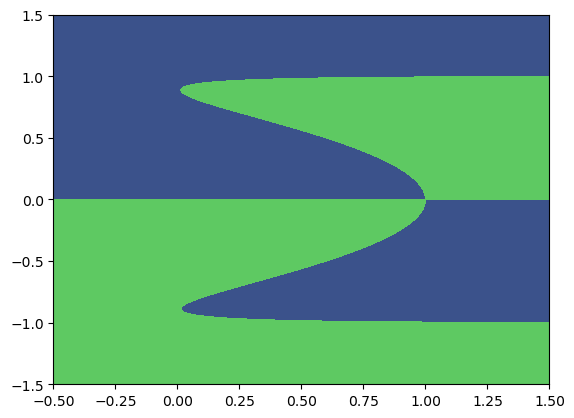

In [4]:
# TRC

x = torch.linspace(-0.5, 1.5, 1000)
y = torch.linspace(-1.5, 1.5, 1000)

xy_grid = torch.meshgrid(x, y, indexing="ij")

x_g = xy_grid[0].T
y_g = xy_grid[1].T.flip(0, 1)

TRC = TRCell()
C = 0.9
B = 2
pars = B, C

ax = TRC.phaseplane(x_g, y_g, pars, input=0, bifurcation=True)
plt.show()

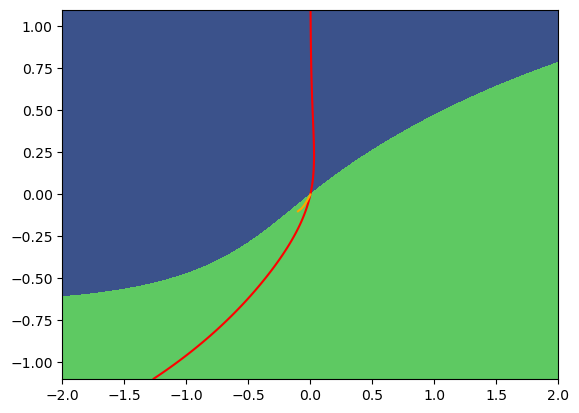

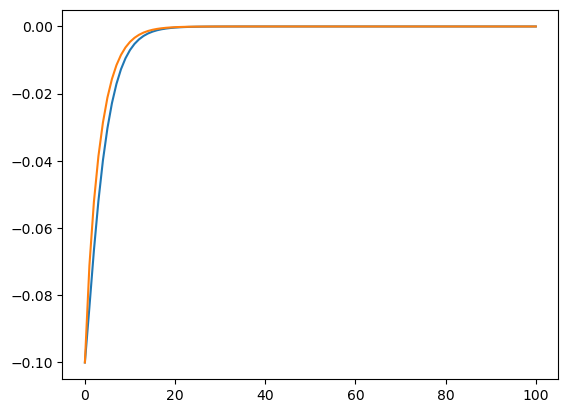

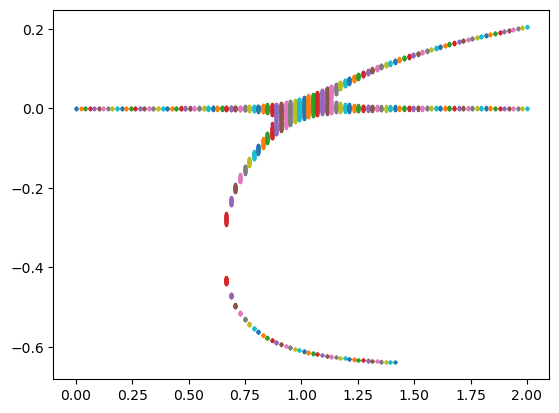

In [6]:
# LSTM

x = torch.linspace(-2, 2, 4001)
y = torch.linspace(-1.1, 1.1, 2201)

xy_grid = torch.meshgrid(x, y, indexing="ij")

x_g = xy_grid[0].T
y_g = xy_grid[1].T.flip(0, 1)

LSTM = LSTMCell()
A = -1
B = -5
C = .3
D = 1.1
P = 0.5
W = 1
Wa = 1
Wb = 1
Wd = 1
Wp = 1

pars = A, B, C, D, P, W, Wa, Wb, Wd, Wp

ax = LSTM.phaseplane(x_g, y_g, pars, input=0)

xt = .0*torch.randn(100)
h0 = -torch.tensor(0.1)
s0 = -torch.tensor(0.1)

ht, st = LSTM.trajectory(h0, s0, pars, xt)
ax.plot(st, ht, 'orange')
plt.show()

plt.plot(ht)
plt.plot(st)
plt.show()


In [ ]:

LSTM = LSTMCell()
A = .5 
B = .5 
C = .8 
D = 5
W =  
Wa =
Wb =
Wd =
Wp = 


pars = A, B, C, D, 1

ax = LSTM.phaseplane(x_g, y_g, pars, input=0)

testx = torch.linspace(-1, 1, 100)
ax.plot(B*torch.tanh(torch.tensor(D*C))/(1-A)*torch.ones_like(testx), testx, 'blue')
ax.plot(-B*torch.tanh(torch.tensor(D*C))/(1-A)*torch.ones_like(testx), testx, 'blue')

ax.plot(testx, -D*torch.ones_like(testx), 'blue')
ax.plot(testx, D*torch.ones_like(testx), 'blue')

xt = .0*torch.randn(50)
h0 = torch.tensor(0.01)
s0 = torch.tensor(0.01)

ht, st = LSTM.trajectory(h0, s0, pars, xt)
ax.plot(st, ht, 'orange')
plt.show()

# plt.plot(xt)
plt.plot(B*torch.tanh(torch.tensor(D*C))/(1-A)*torch.ones_like(xt), 'blue')
plt.plot(D*torch.ones_like(xt), 'blue')
plt.plot(ht)
plt.plot(st)
plt.show()

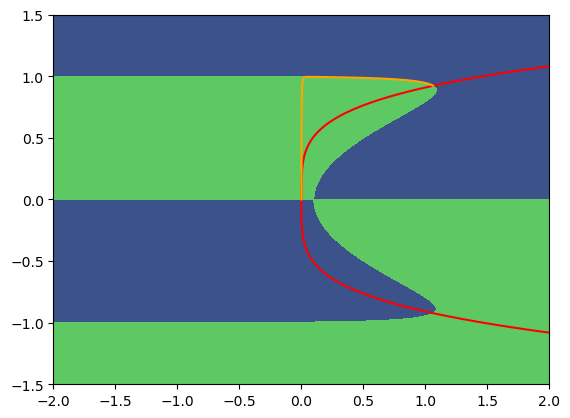

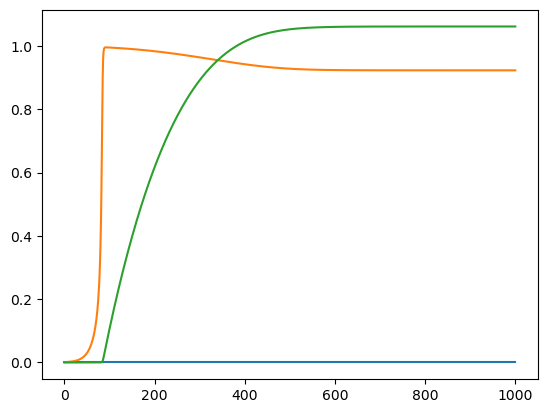

In [15]:
# Flex

x = torch.linspace(-2, 2, 1000)
y = torch.linspace(-1.5, 1.5, 1000)

xy_grid = torch.meshgrid(x, y, indexing="ij")

x_g = xy_grid[0].T
y_g = xy_grid[1].T.flip(0, 1)

FRC = FlexCell()
A = 1.1
B = 2
C = 0.7
D = 0.005
E = 1.1

pars = A, B, C, D, E

ax = FRC.phaseplane(x_g, y_g, pars, input=0)

xt = .0*torch.randn(1000)
h0 = torch.tensor(0.001)
s0 = torch.tensor(0)

ht, st = FRC.trajectory(h0, s0, pars, xt)
ax.plot(st, ht, 'orange')
plt.show()

plt.plot(xt)
plt.plot(ht)
plt.plot(st)
plt.show()

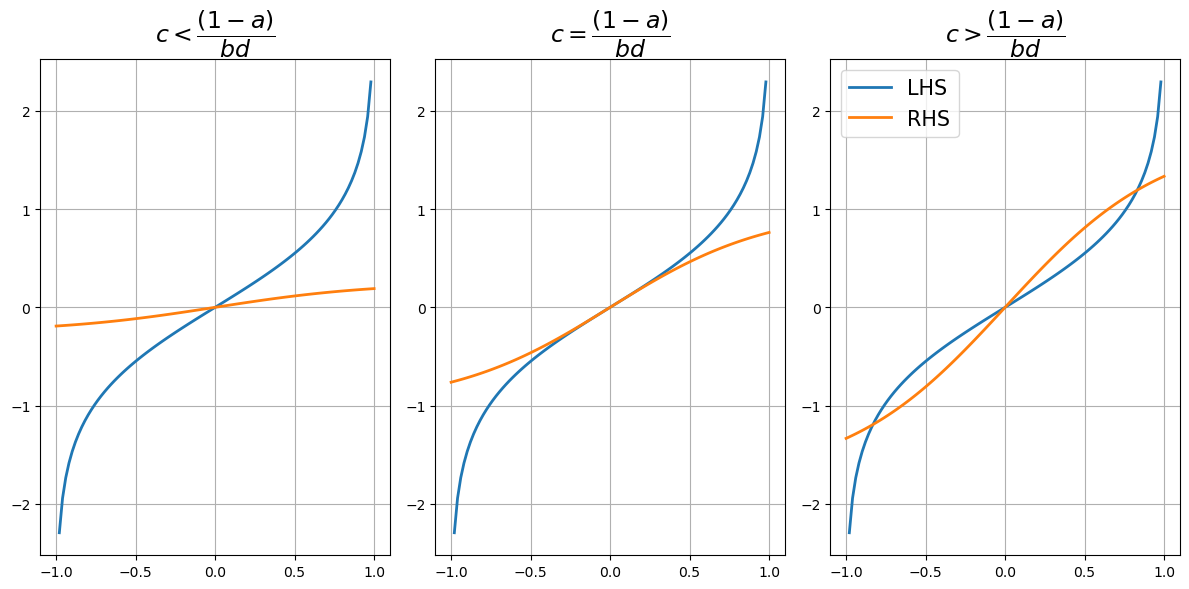

In [245]:
A = .5
B = .5
D = .5
C = (1-A)/(B*D)

s = torch.linspace(-1, 1, 100)

fig, ax = plt.subplots(1, 3, figsize = (12, 6))

ax[0].plot(s, torch.arctanh((1-A)*s/B), label = 'LHS', linewidth = 2)
ax[0].plot(s, (C - 1.5)*D*torch.tanh(s), label = 'RHS', linewidth = 2)
ax[0].grid()
ax[0].set_title(r'$c < \dfrac{(1-a)}{bd}$', fontsize = 17)

ax[1].plot(s, torch.arctanh((1-A)*s/B), label = 'LHS', linewidth = 2)
ax[1].plot(s, (C)*D*torch.tanh(s), label = 'RHS', linewidth = 2)
ax[1].grid()
ax[1].set_title(r'$c = \dfrac{(1-a)}{bd}$', fontsize = 17)

ax[2].plot(s, torch.arctanh((1-A)*s/B), label = 'LHS', linewidth = 2)
ax[2].plot(s, (C + 1.5)*D*torch.tanh(s), label = 'RHS', linewidth = 2)
ax[2].grid()
ax[2].legend(fontsize = 15)
ax[2].set_title(r'$c > \dfrac{(1-a)}{bd}$', fontsize = 17)

plt.tight_layout()
plt.savefig('images/Bifurcation.pdf')
plt.show()
